In [1]:
import matplotlib.pyplot as plt
import requests as req
import time
import pandas as pd

In [2]:
store = []
for i in range(100):
    resp = req.get("http://api.open-notify.org/iss-now.json")
    respdata= resp.json()
    store.append((respdata["timestamp"], respdata["iss_position"]["latitude"], respdata["iss_position"]["longitude"]))
    time.sleep(10)

In [3]:
print (store)

[(1658482757, '49.1708', '143.6393'), (1658482768, '49.3998', '144.6801'), (1658482779, '49.6091', '145.6847'), (1658482790, '49.8000', '146.6520'), (1658482800, '49.9820', '147.6273'), (1658482812, '50.1711', '148.7045'), (1658482824, '50.3566', '149.8374'), (1658482835, '50.5160', '150.8837'), (1658482847, '50.6716', '151.9849'), (1658482858, '50.8099', '153.0453'), (1658482869, '50.9376', '154.1126'), (1658482880, '51.0546', '155.1852'), (1658482891, '51.1655', '156.3124'), (1658482902, '51.2605', '157.3955'), (1658482913, '51.3445', '158.4831'), (1658482924, '51.4176', '159.5744'), (1658482935, '51.4770', '160.6206'), (1658482946, '51.5284', '161.7181'), (1658482957, '51.5686', '162.8178'), (1658482967, '51.5966', '163.8690'), (1658482978, '51.6144', '164.9214'), (1658482989, '51.6220', '166.0248'), (1658483000, '51.6184', '167.1281'), (1658483011, '51.6035', '168.2310'), (1658483022, '51.5774', '169.3329'), (1658483032, '51.5421', '170.3832'), (1658483044, '51.4917', '171.5317'), 

In [4]:
df = pd.DataFrame(store, columns = ["Timestamp","Latitude","Longitude"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Timestamp  100 non-null    int64 
 1   Latitude   100 non-null    object
 2   Longitude  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


In [5]:
df[['Latitude','Longitude']] = df[['Latitude','Longitude']].apply(pd.to_numeric)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  100 non-null    int64  
 1   Latitude   100 non-null    float64
 2   Longitude  100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
x = df['Latitude']
y = df['Longitude']
labels = df['Timestamp']

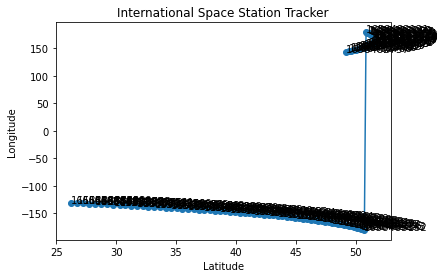

In [10]:
plt.scatter(x,y)
plt.plot(x,y)
plt.title("International Space Station Tracker")
plt.xlabel("Latitude")
plt.ylabel("Longitude")

for i, txt in labels.items():
    plt.annotate(txt, xy=(x[i],y[i]))
   

plt.show()